In [1]:
import importlib

import utils

importlib.reload(utils)
from utils import fit_accuracy_from_task_loss, fit_task_loss_from_ladder_models, plot_actual_vs_predicted, plot_fit

/Users/nikilravi/miniconda3/envs/crfm_new/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-30 01:19:11,391	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
ENTITY = "stanford-mercury"
PROJECT = "marin"

# define the list of smaller runs to use as "ladder" models
RUNS = [
    "tootsie-scaling-512-81c36c",
    "tootsie-scaling-768-d17a90",
    "tootsie-scaling-1024-f4e4be",
    "tootsie-scaling-1536-e2a6d8",
    "tootsie-scaling-2048-72c648",
]

# the large run to predict the performance of
PRED_RUN = "llama-8b-tootsie-0.001-19ad63"

# define the eval task loss metric
TASK_LOSS = "eval/paloma/c4_en/bpb"
# TASK_LOSS = "internal_eval/mmlu/bpb"

# do we want to take the last step of the run or average over all steps, or just use all steps?
AGGREGATION = "all"

TOKENS_COL = "throughput/total_tokens"
PARAM_COL = "parameter_count"
PARAM_COL_TO_USE = "computed_params"

# accuracy we ultimately want to predict
TASK_ACCURACY = "lm_eval/hellaswag_0shot/acc"

## Predict task loss from N, D

Computed params: 248791040
Computed params: 461266944
Computed params: 732463104
Computed params: 1451016192
Computed params: 2337341440
Fitted params (small runs): (np.float64(0.5912407998703356), np.float64(0.32552829988346244), np.float64(1.7209934883251436), np.float64(1.0393213322392638), np.float64(0.017749806094150593))
Computed params: 8030257152


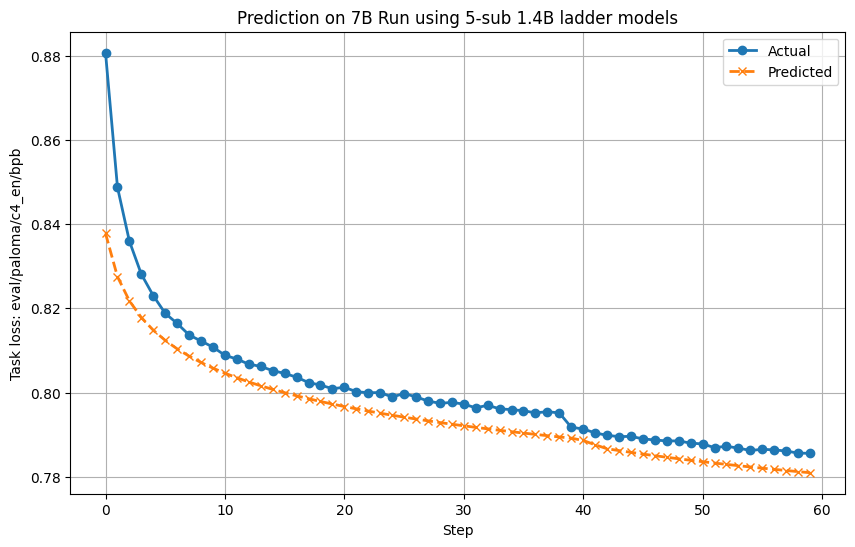

In [3]:
actual, predicted = fit_task_loss_from_ladder_models(
        runs=RUNS,
        entity=ENTITY,
        project=PROJECT,
        metrics=[TASK_LOSS, TOKENS_COL, TASK_ACCURACY],
        pred_run=PRED_RUN,
        task_loss=TASK_LOSS,
        aggregation=AGGREGATION,
        tokens_col=TOKENS_COL,
        param_col=PARAM_COL,
        param_col_to_use=PARAM_COL,
        use_log_for_ND=True,
        normalize_ND=True,
    )

plot_actual_vs_predicted(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

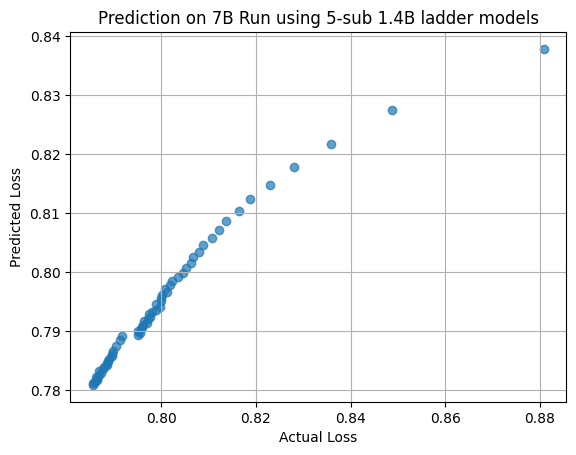

In [4]:
plot_fit(actual, predicted, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

In [5]:
print(len(actual))
print(len(predicted))

60
60


## Predict task accuracy from task loss

In [11]:
importlib.reload(utils)

from utils import fit_accuracy_from_task_loss

# get accuracy, which is hellaswag accuracy
actual_acc, pred_acc = fit_accuracy_from_task_loss(
    pred_task_losses=predicted,
    runs=RUNS,
    entity=ENTITY,
    project=PROJECT,
    x_axis="throughput/total_gflops",
    tokens_col=TOKENS_COL,
    pred_run=PRED_RUN,
    aggregation=AGGREGATION,
    task_loss_col=TASK_LOSS,
    accuracy_col=TASK_ACCURACY,
)

Computed params: 248791040
Computed params: 461266944
Computed params: 732463104
Computed params: 1451016192
Computed params: 2337341440
Number of rows in ladder_df before filtering/aggregation: 23
Computed params: 8030257152
Number of rows in ladder_df_agg: 23
Number of rows in pred_df_agg: 21
Task losses: [1.03992105 1.02433276 1.01896524 1.01339889 1.00079024 0.98702013
 0.96968013 0.9626531  0.9577195  0.94924712 0.93868661 0.93021083
 0.9245671  0.91772169 0.92029053 0.90084755 0.8924098  0.8807596
 0.90359932 0.88121676 0.87281394 0.86664855 0.86092269]
Accuracies: [0.31119299 0.3220474  0.32603067 0.32951603 0.32891854 0.3433579
 0.35889265 0.36885083 0.37572197 0.37940649 0.39304919 0.39673372
 0.40370444 0.40928102 0.4071898  0.43019319 0.43835889 0.45040829
 0.42451703 0.45289783 0.4634535  0.46664011 0.47839076]
Task losses shape: (23,)
Accuracies shape: (23,)
Going to fit sigmoidal model
Fitted sigmoidal params: [ 0.51856808  0.24354839 -9.42997161  0.83900884]
Fitted sigmo

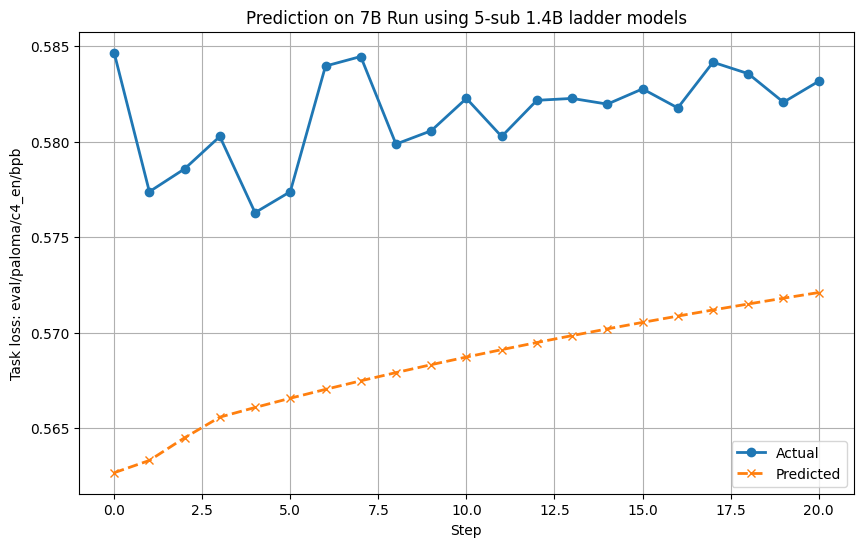

In [12]:
plot_actual_vs_predicted(actual_acc, pred_acc, title="Prediction on 7B Run using 5-sub 1.4B ladder models")

In [ ]:
from utils import pull_metrics_from_wandb

pred_df = pull_metrics_from_wandb(
        runs=[PRED_RUN],
        metrics=[TASK_LOSS, TOKENS_COL],
        entity=ENTITY,
        project=PROJECT,
        x_axis="throughput/total_gflops",
        summary_fields=(PARAM_COL,)
    )

Computed params: 8030257152


In [ ]:
len(pred_df)

61

In [ ]:
# show the full dataframe
pred_df.head(60)

,eval/paloma/c4_en/bpb,throughput/total_tokens,run,computed_params,parameter_count,step
0,3.768838,0.000000e+00,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,0
1,0.880757,2.097152e+10,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,1
2,0.848793,4.194304e+10,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,2
3,0.835961,6.291456e+10,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,3
4,0.828110,8.388608e+10,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,4
5,0.823020,1.048576e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,5
6,0.818820,1.258291e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,6
7,0.816417,1.468006e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,7
8,0.813680,1.677722e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,8
9,0.812240,1.887437e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,9


In [ ]:
pred_df_acc = pull_metrics_from_wandb(
        runs=[PRED_RUN],
        metrics=[TASK_ACCURACY, TOKENS_COL],
        entity=ENTITY,
        project=PROJECT,
        x_axis="throughput/total_gflops",
        summary_fields=(PARAM_COL,)
    )

pred_df_acc.head(n=20)

Computed params: 8030257152


,lm_eval/hellaswag_0shot/acc,throughput/total_tokens,run,computed_params,parameter_count,step
0,0.584644,8.388608e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,0
1,0.577375,8.808038e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,1
2,0.578570,9.646899e+11,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,2
3,0.580263,1.048576e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,3
4,0.576280,1.090519e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,4
5,0.577375,1.132462e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,5
6,0.583947,1.174405e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,6
7,0.584445,1.216348e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,7
8,0.579865,1.258291e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,8
9,0.580562,1.300234e+12,llama-8b-tootsie-0.001-19ad63,8030257152,8030261248,9
